# Problem set #5 PHY256  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# following
# http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

### Problem 1.   Making an animation

1.  Choose a physical system that you would like to animate.

Examples are 
    *    A bouncing ball.
    *    A driven pendulum.
    *    A rotating object.
    *    Your own idea here!

2.  Create an animation of your system! 

3.  Post/upload your animation so you can share it with an html link and send me the link!  


###   Ways to make an animation:  

Unfortunately, animations in python are not as as straightforward as in some other platforms such as javascript.

Here are some ways you can do this:

+  Use *IPython.display* in a notebook as shown below.

+  You could save a series of images and then turn the series of images into an animated gif or a movie using *ffmpeg* https://ffmpeg.org/ or *ImageMagick* https://imagemagick.org/index.php .

+  You could try the latest version of vpython https://vpython.org/ which has very much improved in the last 2 years.  

+  I am a fan of https://p5js.org . Javascript is not python, but you can beautifully simulate physical systems with it. It is possible to host Javascript routines on github so that a simulation will run in a browser via a link. 

If you can see the animation on your screen, one way to save it so that you can share it is to capture it via screen capture.




### Illustrating a way to do an animation in a python notebook with IPython.display

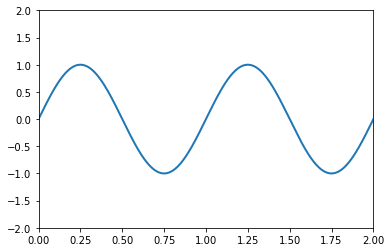

In [2]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

# this is where line is defined!
line, = ax.plot([], [], lw=2)
# line is an object
# the x,= unpacks only the first thing in the tuple that is returned by the 
#     object function ax.plot()
# there could be multiple things plotted so ax.plot could have more than one thing
#    in the tuple.


x = np.linspace(0, 2, 1000)
i=100
y = np.sin(2 * np.pi * (x - 0.01 * i))
line.set_data(x, y)  # showing how to plot something with the line object


According to https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.plot.html

*ax.plot* returns 

    A list of Line2D objects representing the plotted data.
    
According to:  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D

*line2D* is a class that contains

    x and y data in sequences xdata, ydata.
    
The *line2D* object has a function *set_data()* that we have used to plot two arrays



In [3]:
# initialization function: plot the background of each frame
# *line* is a line2D object that we have previously defined globally 
def init():
    line.set_data([], [])
    return (line,)   # returns a tuple with the object *line* in it

# animation function. This is called sequentially with integer i increasing
# this routine expects that a global object line has been defined 
def animate_fun(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))  # phase shift the sine
    line.set_data(x, y)
    return (line,)

# call the animator. 
anim = animation.FuncAnimation(fig, animate_fun, init_func=init,
                               frames=100, interval=20, blit=True)

# i will range from 0 to 100-1 
# interval sets the time between updates
# blit=True means only re-draw the parts that have changed.
# animate_fun is not yet called here

In [4]:
# now compute all the sequences and animate
HTML(anim.to_html5_video())
# joy! this worked!

In [5]:
HTML(anim.to_jshtml()) # I like this type of display even better!

### a slightly more streamlined version of the above animation code

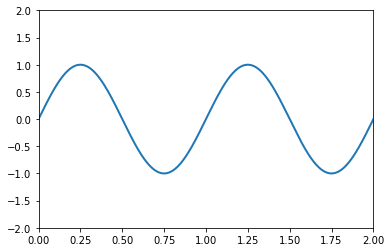

In [6]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    animate_fun(0)
    return line,

# animation function.  This is called sequentially
def animate_fun(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate_fun, init_func=init,
                               frames=100, interval=20, blit=True)



In [7]:
HTML(anim.to_jshtml()) # I like this display !

### a version that computes and stores what is displayed first before animating

Possibly an advantage if you are doing a lot of computation prior to running
the animation.

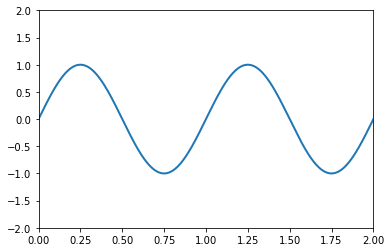

In [8]:
# Set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

nframes=100  # number of frames to disply
nx = 1000
x = np.linspace(0, 2, nx)
yarr = np.zeros((nx,nframes))  # store y arrays for each frame
# fill up the 2darray for each display frame
for i in range(nframes):
    yarr[:,i] = np.sin(2 * np.pi * (x - 0.01 * i))

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    animate_fun(0)
    return line,

# animation function.  This is called sequentially
def animate_fun(i):
    line.set_data(x, np.squeeze(yarr[:,i]))  # np.squeeze makes this a 1d array
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate_fun, init_func=init,
                               frames=100, interval=20, blit=True)



In [9]:
HTML(anim.to_jshtml()) # 

##  Problem 2. The Kuramoto synchronization model for coupled oscillators

Our goal is to explore a model that is used to 
described synchronization of oscillators.

The Kuramoto model is a set of $N$ interacting oscillators.
Each oscillator is described with an 
angle $\theta_i$.  The indices range from 0, .... $N-1$.

Each oscillator has an intrinsic frequency 
or phase velocity $\omega_i$.

In the absence of interactions between oscillators 
$$ \frac{d\theta_i}{dt} = \omega_i$$

The phases continually advance, as you would expect for the phase of an isolated harmonic oscillator.

With interactions
$$\frac{d \theta_i}{dt} = \omega_i + \sum_{j=0}^{N-1} K_{ij} \sin (\theta_j- \theta_i) $$

If the interaction strengths $K_{ij}>0$ are strong enough, the oscillators will synchronize.

A <b> synchronized </b> state is one where  
$\theta_i = \theta_j$ for all $i,j$.  Note 
$\theta_i$ is not necessarily constant.

Notice that all the oscillators interact with every other oscillator.
The model is more appropriate for a bunch of fireflies than a chain of oscillators with nearest neighbor interactions. 


See
https://en.wikipedia.org/wiki/Kuramoto_model



### A simple version of the Kuramoto coupled oscillator model

For our simple exploration we set $\omega_i=1$ for all oscillators
and we set $K_{ij} = K >0$ the same for each pair of oscillators.

This gives
$$\frac{d \theta_i}{dt} = 1 + \sum_{j=0}^{N-1} K \sin (\theta_j- \theta_i) $$


We start with an array of phases $\theta_i$.
We use the index $n$ to refer to the time step of our integrator.
From the phases $\theta_i^n$,  at time step $n$ we want to compute
the phases at the next time step.  If the timestep is $\Delta t$

$$\frac{d \theta^n_i}{dt} \sim \frac{ \theta^{n+1}_i - \theta^n_i}{\Delta t} $$

This gives
$$ \theta^{n+1}_i = \theta_i^n + \Delta t \frac{d \theta^n_i}{dt} $$
With the equations of motion this gives

$$ \theta^{n+1}_i = \theta_i^n  + \Delta t \left(1 + \sum_{j=0}^{N-1} K \sin (\theta_j^n- \theta_i^n)\right) $$

We can  use this to compute the new array of phases
from the previous one.

### Our goal

Our goal is to write a routine that takes
as arguments,  an array of $N$
phases each between 0 and $2\pi$,  
the interaction strength $K$ and a time step interval $\Delta t$.

The routine should return the new phase array after a time $\Delta t$!

It would also be useful to have a routine that returns arrays at different
timesteps or numbers of iterations of the previous routine.


Some notes:  

You need to keep 
the phases within $[0,2\pi)$. Take the modulo $2 \pi$ after you compute
the new phases.

Keep the timestep $\Delta t \ll 1$.

### initial conditions 

I would initialize the array with randomly chosen phases.  For example with $N$
the number of oscillators 
```
theta_arr_init  = random.random(N)*2*np.pi
```
gives initial phases randomly chosen in $[0,2\pi)$

I found that it can be faster to compute the new array after
a single timestep using the function 
*numpy.roll()* 

https://numpy.org/doc/stable/reference/generated/numpy.roll.html

For example

```
dtheta_arr = np.zeros(N) + 1  # intrinsic phase velocity is 1 
                              # for all oscillators
for j in range(N):   # loop over all possible shifts
    thetaj = np.roll(theta_arr,j)   # shift the array by j
    dtheta_arr += K*np.sin(thetaj - theta_arr) # add to dtheta/dt 
new_theta_arr = theta_arr + dtheta_arr*dt   # do the timestep
```

In the above code, why do I ignore the special case $i=j$?

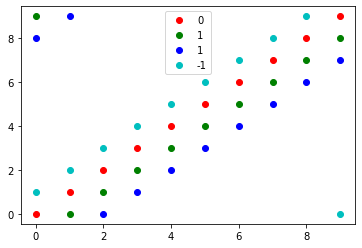

In [11]:
#Here is an example of using np.roll to shift arrays
xarr = np.arange(10)
plt.plot(xarr,'ro',label='0')
xarr_roll_1 = np.roll(xarr,1)
plt.plot(xarr_roll_1,'go',label='1')
xarr_roll_2 = np.roll(xarr,2)
plt.plot(xarr_roll_2,'bo',label='1')
xarr_roll_m1 = np.roll(xarr,-1)
plt.plot(xarr_roll_m1,'co',label='-1')
plt.legend()

### Problem 2 continued


1.  Write a routine that takes as arguments
    * an array of N phases
    * dt the timestep
    * *K* the interaction strength 
    * (optional) an array of intrinsic frequencies $\omega_i$.  You can ignore this if you set $\omega_i=1$. 
    
    and returns a new array of phases, one timestep later, computed for the Kuramoto model.

2.  Write a routine that runs *nsteps* time-steps, returning the array of phases after interating this number of times. 

3.  Write a routine that initializes an array of phases with random numbers in $[0,2\pi)$

4.  With initially random phases, run the Kuramoto model to see if the phases synchronize.    This is your goal.  1-3 are only to help you get there.


Some notes:  If all intrinsic frequencies are 1, the phases will synchronize for any value of $K>0$, though if $K$ is small it will take longer.   If you chose to run the model with a distribution of intrinsic velocities, then the system will not synchronize unless $K$ is above a critical value.


### What to plot?

You will need to decide what to plot to see if your routines work.  
Here are some options:

+  You can plot the array of phases $\theta_j$ at different timesteps. At the begining the angles will be random and when they sychronize they will all be similar.

+  You can fill a 2d array with phase array outputs. One dimension of the 2d array is $N$, the number of oscillators. The other dimension of the 2d array is the number of time steps $nsteps$.  You could show this as an image. In the image you should see all the phases start to align.

+  As all oscillators interact with all other oscillators, there is no prefered order.  We could plot all the phases as dots on the unit circle and plot or animate the plot.  This is what is done here: https://en.wikipedia.org/wiki/Kuramoto_model

+  You can plot an order parameter as a function of time.  The order parameter $r$ is computed  from a sum of the oscillator phases and is near 0 if the phases are randomly distributed and is 1 if the system is perfectly synchronized.

$$ r = \sqrt{ \left( \frac{1}{N} \sum_{i=0}^{N-1} \cos \theta_i  \right)^2 + \left( \frac{1}{N}\sum_{i=0}^{N-1} \sin \theta_i  \right)^2} $$ 
